In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
df = pd.read_csv("D:\Data scientist\Dataset\Customers.csv")

In [9]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.shape

(200, 5)

In [4]:
x = df.iloc[:,[2,4]].values

### Using elbow method to find the optimal number of cluster

In [5]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

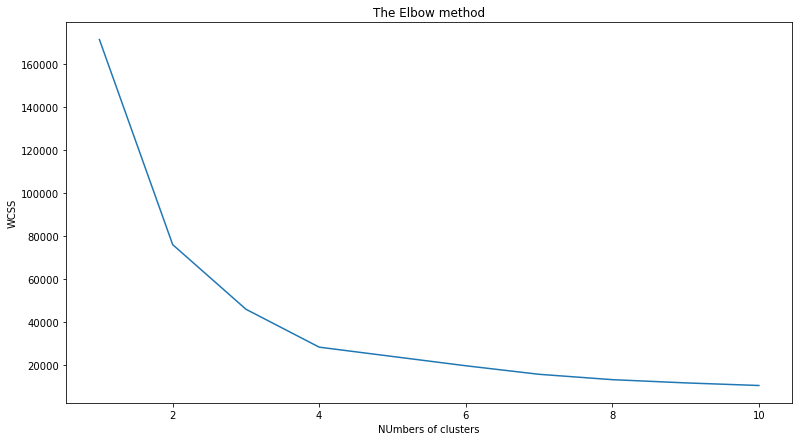

In [6]:
plt.figure(figsize=(13,7))
plt.plot(range(1,11),wcss)
plt.title("The Elbow method")
plt.xlabel("NUmbers of clusters")
plt.ylabel("WCSS")

plt.show()

In [7]:
top_kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_means = top_kmeans.fit_predict(x)

### Visulualize the Cluster

In [46]:
y_means

array([0, 2, 5, 2, 0, 2, 5, 2, 4, 2, 4, 2, 4, 2, 5, 2, 1, 0, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 0, 1, 2, 4, 2, 4, 2, 4, 2, 5, 2, 5, 2, 3, 2, 1, 0,
       1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 1, 1, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       1, 3, 0, 0, 3, 1, 3, 3, 3, 0, 1, 1, 0, 1, 3, 0, 3, 1, 0, 1, 3, 0,
       0, 1, 3, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 1, 0, 0, 0, 3, 3, 1, 3, 0, 1, 0, 2, 5, 2, 1, 2, 4, 2, 4, 2,
       0, 2, 5, 2, 4, 2, 5, 2, 4, 2, 0, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 2,
       4, 2, 5, 2, 5, 2, 1, 2, 5, 2, 1, 2, 5, 2, 5, 0, 5, 2, 5, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 5, 2, 5, 2, 5, 2, 4, 2, 1, 2,
       5, 2])

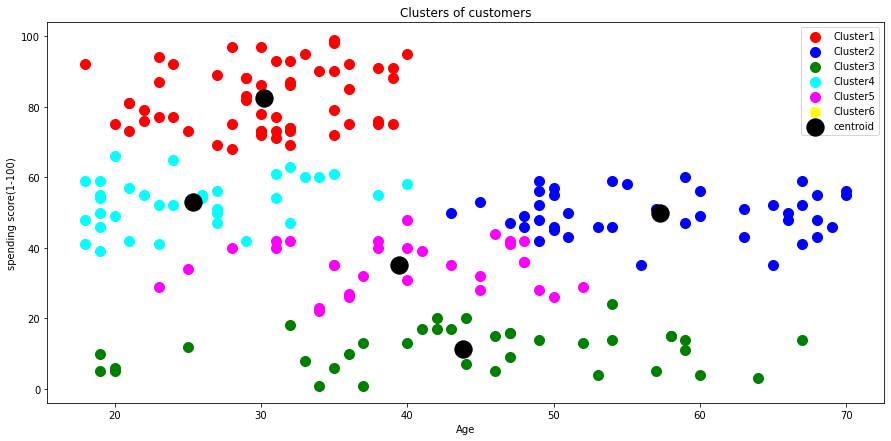

In [8]:
plt.figure(figsize=(15,7))

plt.scatter(x[y_means==0,0], x[y_means==0,1],s=100,c="red",label='Cluster1')
plt.scatter(x[y_means==1,0], x[y_means==1,1],s=100,c="blue",label='Cluster2')
plt.scatter(x[y_means==2,0], x[y_means==2,1],s=100,c="green",label='Cluster3')
plt.scatter(x[y_means==3,0], x[y_means==3,1],s=100,c="cyan",label='Cluster4')
plt.scatter(x[y_means==4,0], x[y_means==4,1],s=100,c="magenta",label='Cluster5')
plt.scatter(x[y_means==5,0], x[y_means==5,1],s=100,c="yellow",label='Cluster6')

plt.scatter(top_kmeans.cluster_centers_[:,0],top_kmeans.cluster_centers_[:,1],s=300,c='black',label="centroid")
plt.title("Clusters of customers")
plt.xlabel("Age")
plt.ylabel('spending score(1-100)')
plt.legend()
plt.show()